In [30]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
fp_cnt = {}
male_arrests = {}
female_arrests = {}

with open('clarity_dataset/FICT_ARREST_DATA.csv', 'r') as arrest_csv:
    import csv
    arrest_str_data = csv.reader(arrest_csv, delimiter=',')
    skip = False
    for row in arrest_str_data:
        if not skip:
            skip = True
            continue
            
        gender = row.pop(7)
        row.pop(6)
        row.pop(5)
        row.pop(4)
        fp_id = row.pop(3)
        
        if gender == 'M':
            if fp_id in male_arrests:
                male_arrests[fp_id].append(row)
            else:
                male_arrests[fp_id] = [row]
        else:
            if fp_id in female_arrests:
                female_arrests[fp_id].append(row)
            else:
                female_arrests[fp_id] = [row]

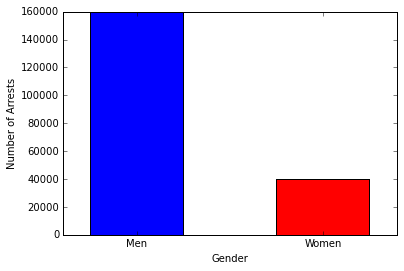

[['735792', '24-MAY-15 10:15', 'RESIDENCE PORCH/HALLWAY', '', 'TRESPASSING - REMAIN ON PROPERTY', '', '26', '363317'], ['1080531', '03-NOV-14 20:46', 'STREET', '', 'CANNABIS - POSSESS 2.5-10 GRMS', 'M', '18', '419873'], ['2258688', '16-MAR-13 11:40', 'STREET', '', 'CANNABIS - POSSESS CANNABIS/10-30 GRAMS/SUBQ', 'F', '18', '351603'], ['1523286', '23-MAR-14 16:16', 'STREET', '', 'CANNABIS - MFG/DEL - 30-500 GRMS', 'F', '18', '375988'], ['1489692', '09-APR-14 17:15', 'STREET', '', 'IVC - DRIVING UNDER INFLUENCE OF ALCOHOL', 'M', '21', ''], ['1351584', '18-JUN-14 03:07', 'STREET', '', 'LIGHT, TAIL LIGHTS REQUIRED', '', 'TRF', ''], ['2316843', '16-FEB-13 06:40', 'SIDEWALK', '', 'BATTERY - CAUSE BODILY HARM', 'M', '08B', '569818']]
[['1371366', '07-JUN-14 22:54', 'ALLEY', '', 'CRIM DAMAGE PROP-KNOWINGLY DAMAGE <$300', 'M', '14', '536848']]


Female arrests:  40116
Male arrests:  159886


In [32]:
plt.bar([1,2], [len(male_arrests.keys()), len(female_arrests.keys())], align='center', width=0.5, color=['b', 'r'])
plt.xticks([1,2], ['Men', 'Women'])
plt.xlabel('Gender')
plt.ylabel('Number of Arrests')
plt.show()

print(male_arrests[male_arrests.keys()[0]])
print(female_arrests[female_arrests.keys()[0]])

print("\n\nFemale arrests: ", len(female_arrests))
print("Male arrests: ", len(male_arrests))

In [28]:
cnt = 0

con_vic = {}

with open('clarity_dataset/FICT_VICTIM_DATA.csv', 'r') as victim_csv:
    import csv
    victim_str_data = csv.reader(victim_csv, delimiter=',')
    skip = False
    for row in victim_str_data:
        if not skip:
            skip = True
            continue
    
        if row[2] in male_arrests or row[2] in female_arrests:
            cnt = cnt + 1
    
print('Gunshot victims who were also arrested criminals: ', cnt)

Gunshot victims who were also arrested criminals:  5094
